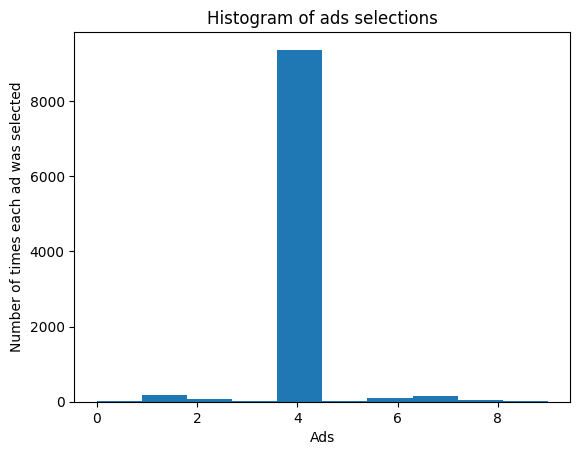

In [1]:
# Line 1: ---------------------------- IMPORT LIBRARIES ----------------------------

import numpy as np                      # Line 2: For numerical computations (not directly used here, but standard)
import matplotlib.pyplot as plt         # Line 3: For visualizing the results using plots
import pandas as pd                     # Line 4: To load and manipulate the dataset

# Line 5: ---------------------------- LOAD DATA ----------------------------

dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
# Line 6: Dataset has 10 columns (ads) and 10,000 rows (user sessions). Each value is 1 (click) or 0 (no click)

# Line 7: ---------------------------- THOMPSON SAMPLING INITIALIZATION ----------------------------

import random                           # Line 8: For generating beta-distributed random variables

N = 10000                               # Line 9: Total number of ad display attempts (rounds)
d = 10                                  # Line 10: Number of available ads

ads_selected = []                       # Line 11: List to track which ad was selected each round
numbers_of_rewards_1 = [0] * d          # Line 12: Count of times each ad received a reward of 1 (clicked)
numbers_of_rewards_0 = [0] * d          # Line 13: Count of times each ad received a reward of 0 (not clicked)
total_reward = 0                        # Line 14: Sum of all rewards (total number of ad clicks)

# Line 15: ---------------------------- MAIN THOMPSON SAMPLING LOOP ----------------------------

for n in range(0, N):                   # Line 16: Loop through each round
    ad = 0                              # Line 17: Placeholder for chosen ad index
    max_random = 0                      # Line 18: Track the maximum sampled probability

    for i in range(0, d):               # Line 19: Loop through all ads
        # Generate random sample from beta distribution (Bayesian estimate of CTR)
        random_beta = random.betavariate(
            numbers_of_rewards_1[i] + 1,     # Line 21: Alpha = success count + 1
            numbers_of_rewards_0[i] + 1      # Line 22: Beta = failure count + 1
        )

        if random_beta > max_random:        # Line 24: Keep the ad with highest sampled CTR
            max_random = random_beta        # Line 25
            ad = i                          # Line 26

    ads_selected.append(ad)                 # Line 27: Store the chosen ad for this round
    reward = dataset.values[n, ad]          # Line 28: Get the reward (1 or 0) from dataset

    # Update the reward counters for the selected ad
    if reward == 1:                         # Line 30: If user clicked the ad
        numbers_of_rewards_1[ad] += 1       # Line 31: Increment success count
    elif reward == 0:                       # Line 32: If user did not click the ad
        numbers_of_rewards_0[ad] += 1       # Line 33: Increment failure count

    total_reward += reward                  # Line 34: Update total number of clicks

# Line 35: ---------------------------- PLOTTING THE RESULTS ----------------------------

plt.hist(ads_selected)                     # Line 36: Histogram of how many times each ad was selected
plt.title('Histogram of ads selections')   # Line 37: Title of the plot
plt.xlabel('Ads')                          # Line 38: Label for x-axis (ad index from 0 to 9)
plt.ylabel('Number of times each ad was selected')  # Line 39: Y-axis showing frequency of selection
plt.show()                                 # Line 40: Display the plot
